# 1. Random walk

## 1.1 Definições para Random walk 


![Fig 1](img/rw-fig01.jpeg)


## 1.2 Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math



## 1.3 Indivíduo
- Duas funções fitness
    - Equação
    - Palavra


In [2]:
def gerar_lista_aleatoria(tamanho, lb, ub):
    lista = []    
    
    for i in range(tamanho):

        valor_aleatorio = random.uniform(0, 1)
        valor = 0
        if len(lb)==1: 
            valor = lb[0] + (ub[0] - lb[0]) * valor_aleatorio
        else:
            valor = lb[i] + (ub[i] - lb[i]) * valor_aleatorio

            
        lista.append(valor)

    
    return lista
    

In [3]:
class Individuo:
    
    def __init__(self, atributos, lb, ub):
        #self.valores = []
        self.fitness = 0 #math.inf
        self.valores = gerar_lista_aleatoria(atributos, lb, ub)
        
        if (len(lb) == 1):
            self.calc_fitness_palavra()
        else:
            self.calc_fitness_equacao()

   # def adicionar_valor(self,valor):
   #     self.valores.append(valor)
        
        

    def calc_fitness_equacao(self):
         fun = 10 * (self.valores[0]-1)**2 + 20 * (self.valores[1]-2)**2 + 30 * (self.valores[2]-3)**2
         # print('fitness= ', fun)

         #fun_normalizado = (fun - 0) / (750-0)
         self.fitness = fun


    def calc_fitness_palavra(self):
        palavra_alvo = [52.547,72.154,53.694,57.771,115.88,105.59,75.368,126.02,52.756,85.100,80.525,111.24,113.62,64.95,89.181,85.647,101.71,106.75,110.37,72.082,104.38,102.41,63.009,59.52,89.869,126.78,77.231,96.821,67.905,110.1]
           
        diferenca = 0 
        for i in range(len(self.valores)):
            diferenca = diferenca + abs(palavra_alvo[i] - self.valores[i])   

        #diferenca = (diferenca - 52.547) / (126.78 - 52.547)
        
            
        self.fitness = diferenca
            
 

     

## 1.4 População

- Gerar população
- Gerar população complementar
- Gerar Valor aleatório
- Elitismo

In [4]:
       
class Populacao:
    
    def __init__(self, tamanho, atributos, lb,ub):
        self.tamanho = tamanho
        self.atributos = atributos
        self.lb=lb
        self.ub=ub
        self.individuos = []
        self.gerar_populacao(tamanho)
        
    def gerar_populacao_complementar(self):
        self.gerar_populacao(self.tamanho//2)
    

    def gerar_populacao(self,tamanho):
        
        for i in range(tamanho):
            ind = Individuo(self.atributos,self.lb,self.ub)

            #for j in range(self.atributos):
            #    ind.valores.append(self.gerar_valor(j))

            self.individuos.append(ind)

  #  def gerar_valor(self, atributo):
#        #print(atributo)
#        
#        valor_aleatorio = random.uniform(0, 1)
#        valor = 0
#        if len(self.lb)!=1: 
#            valor = self.lb[atributo] + (self.ub[atributo] - self.lb[atributo]) * valor_aleatorio
#        else:
#            valor = self.lb[0] + (self.ub[0] - self.lb[0]) * valor_aleatorio
##
 #       
 #       return valor
    
    def elitismo(self):
        
        self.individuos.sort(key = lambda x : x.fitness )
        self.individuos = self.individuos[:(self.tamanho//2)]
        #print(self.individuos[0].fitness)

        
        

## 1.5 Classe RandomWalk
- Recebe a população
- Gerencia a Execução 

In [5]:
class RandomWalk:
     def __init__(self,populacao, geracoes):
         self.populacao = populacao
         self.geracoes = geracoes
         self.individuos = []
        
      
     def executar(self):
        melhores_fitiness = []
        
        for i in range(self.geracoes):
            self.populacao.elitismo()
            melhores_fitiness.append(self.populacao.individuos[0].fitness)
            
            self.populacao.gerar_populacao_complementar()
            
        return melhores_fitiness     
 

## 1.6 Problema 01: Minimizar Equação - RW
## 1.6.1 Execução

In [6]:
execucoes = 5
populacao = 100
geracoes = 1000

lb = [-3,-2,0]
ub = [3,4,6]


df = pd.DataFrame() 


for i in range(execucoes):

    p = Populacao(populacao,3,lb,ub)

    rw = RandomWalk(p,geracoes)

    fts = rw.executar() 

    df['Exec '+str(i+1)]=fts

display(df)


,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5
0,13.383452,8.297203,2.852141,14.263129,2.586221
1,13.383452,2.869503,2.852141,10.726615,2.586221
2,13.383452,2.869503,2.852141,10.726615,1.085528
3,5.214346,2.869503,2.852141,10.726615,1.085528
4,5.214346,1.290520,2.852141,2.124673,1.085528
...,...,...,...,...,...
995,0.098760,0.162769,0.133024,0.303262,0.180830
996,0.098760,0.162769,0.133024,0.303262,0.180830
997,0.098760,0.162769,0.133024,0.303262,0.180830
998,0.098760,0.162769,0.133024,0.303262,0.180830


### Gráfico das Execuções da equação

<AxesSubplot:>

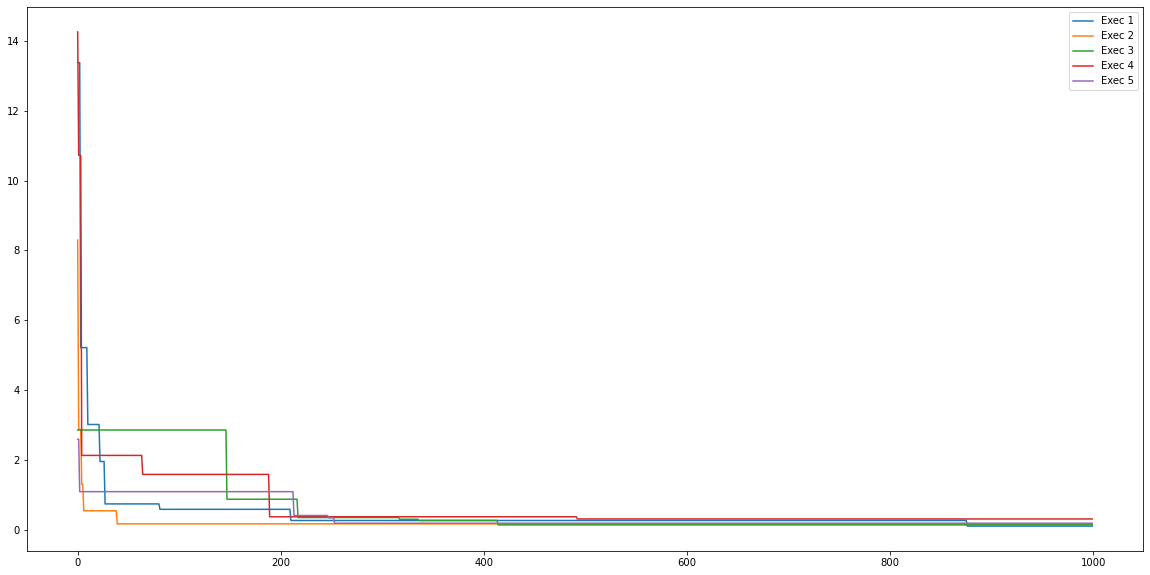

In [7]:
df.plot(figsize=(20,10))

### Gráfico das Médias e desvios

In [8]:


mtemp= df.iloc[:,list(range(execucoes))].mean(axis=1)
desviotemp = df.iloc[:,list(range(execucoes))].std(axis=1)
 
df['media'] = mtemp
df['desvio'] = desviotemp
#df['media'] = df.iloc[:,list(range(execucoes))].mean(axis=1)
#df['desvio'] = df.iloc[:,list(range(execucoes))].std(axis=1)
 
 
df['di'] = df['media']-df['desvio']
df['ds'] = df['media']+df['desvio']

display(df)


,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5,media,desvio,di,ds
0,13.383452,8.297203,2.852141,14.263129,2.586221,8.276429,5.561566,2.714863,13.837995
1,13.383452,2.869503,2.852141,10.726615,2.586221,6.483586,5.173246,1.310340,11.656832
2,13.383452,2.869503,2.852141,10.726615,1.085528,6.183448,5.489742,0.693706,11.673190
3,5.214346,2.869503,2.852141,10.726615,1.085528,4.549626,3.751709,0.797917,8.301336
4,5.214346,1.290520,2.852141,2.124673,1.085528,2.513441,1.665474,0.847967,4.178916
...,...,...,...,...,...,...,...,...,...
995,0.098760,0.162769,0.133024,0.303262,0.180830,0.175729,0.077792,0.097937,0.253522
996,0.098760,0.162769,0.133024,0.303262,0.180830,0.175729,0.077792,0.097937,0.253522
997,0.098760,0.162769,0.133024,0.303262,0.180830,0.175729,0.077792,0.097937,0.253522
998,0.098760,0.162769,0.133024,0.303262,0.180830,0.175729,0.077792,0.097937,0.253522


<AxesSubplot:>

<Figure size 2160x720 with 0 Axes>

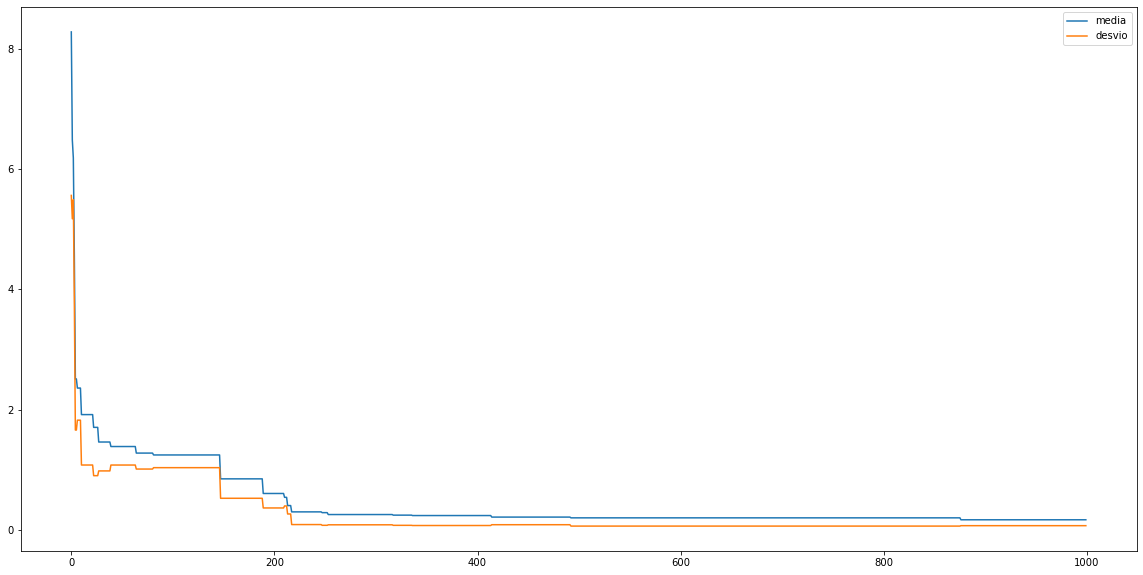

In [9]:
>>> 
plt.figure(figsize=(30,10))
#df.plot().fill_between()
df.plot(y=["media","desvio"],figsize=(20,10))
#df.plot(y=["media","desvio","di","ds"],figsize=(20,10))


In [10]:
### Gráfico das Médias com desvios superior e inferior

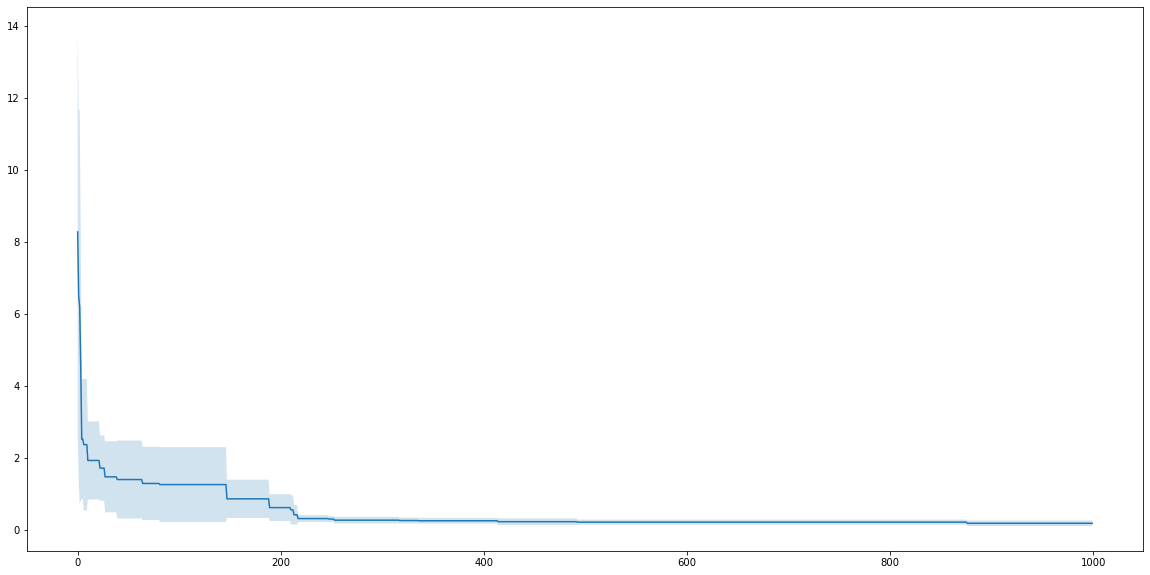

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df['media'],label='Media')
#plt.plot(df['desvio'],label='desvio')
plt.fill_between(list(range(geracoes)),df['di'],df['ds'],alpha=0.2)
plt.show()

## 1.6 Considerações

1. O RW chega em um resultado interessante em poucas gerações, visto que o probelma é simples;
2. A diferença percebida no gráfico, dos desvios inferiores e superiores, é causada pela diminuição do desvio padrão em conjunto da mudança na média;  
3. Uma aparente "piora" dos resultados, com consequente aumento do desvio padrão, se deve ao fato de uma das execuções usadas na média convergir tardiamente, e essa melhora aumenta o desvio.




## 1.7 Problema 02: Palavra - RW
## 1.7.1 Execução

,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5
0,558.081003,543.553720,492.932713,583.653641,517.702374
1,558.081003,498.749991,492.932713,580.245291,517.702374
2,558.081003,498.749991,492.932713,514.036050,517.702374
3,558.081003,498.749991,492.932713,514.036050,517.702374
4,558.081003,498.749991,492.932713,514.036050,517.702374
...,...,...,...,...,...
995,340.866881,407.385208,365.409492,352.134980,399.629067
996,340.866881,407.385208,365.409492,352.134980,399.629067
997,340.866881,407.385208,365.409492,352.134980,399.629067
998,340.866881,407.385208,365.409492,352.134980,399.629067


,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5,media,desvio,di,ds
0,558.081003,543.553720,492.932713,583.653641,517.702374,539.184690,35.193685,503.991005,574.378375
1,558.081003,498.749991,492.932713,580.245291,517.702374,529.542274,38.124345,491.417929,567.666620
2,558.081003,498.749991,492.932713,514.036050,517.702374,516.300426,25.528304,490.772122,541.828730
3,558.081003,498.749991,492.932713,514.036050,517.702374,516.300426,25.528304,490.772122,541.828730
4,558.081003,498.749991,492.932713,514.036050,517.702374,516.300426,25.528304,490.772122,541.828730
...,...,...,...,...,...,...,...,...,...
995,340.866881,407.385208,365.409492,352.134980,399.629067,373.085126,29.227195,343.857931,402.312321
996,340.866881,407.385208,365.409492,352.134980,399.629067,373.085126,29.227195,343.857931,402.312321
997,340.866881,407.385208,365.409492,352.134980,399.629067,373.085126,29.227195,343.857931,402.312321
998,340.866881,407.385208,365.409492,352.134980,399.629067,373.085126,29.227195,343.857931,402.312321


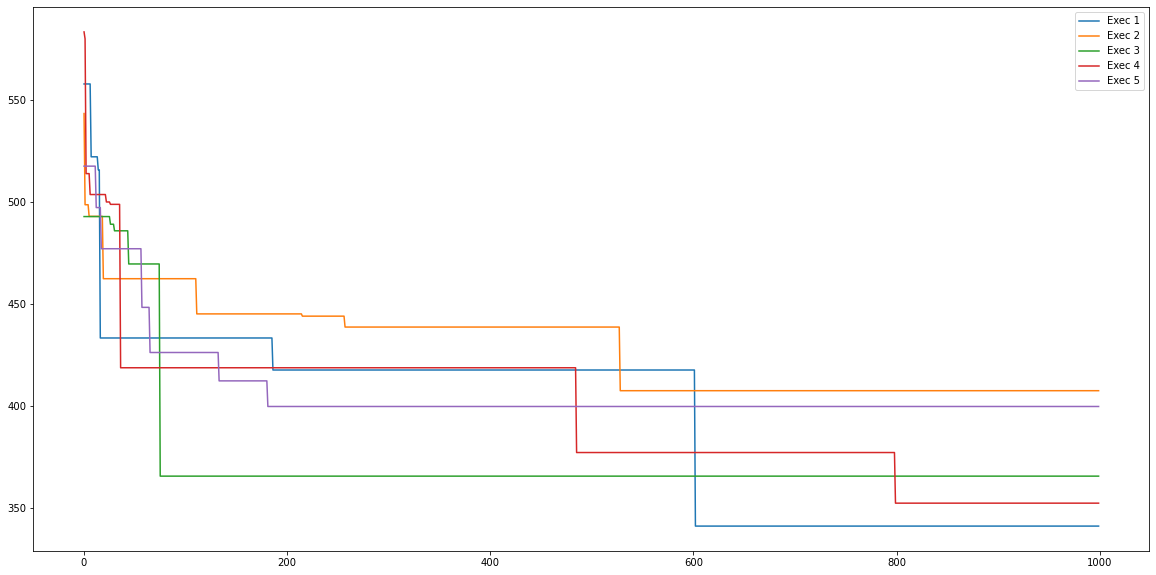

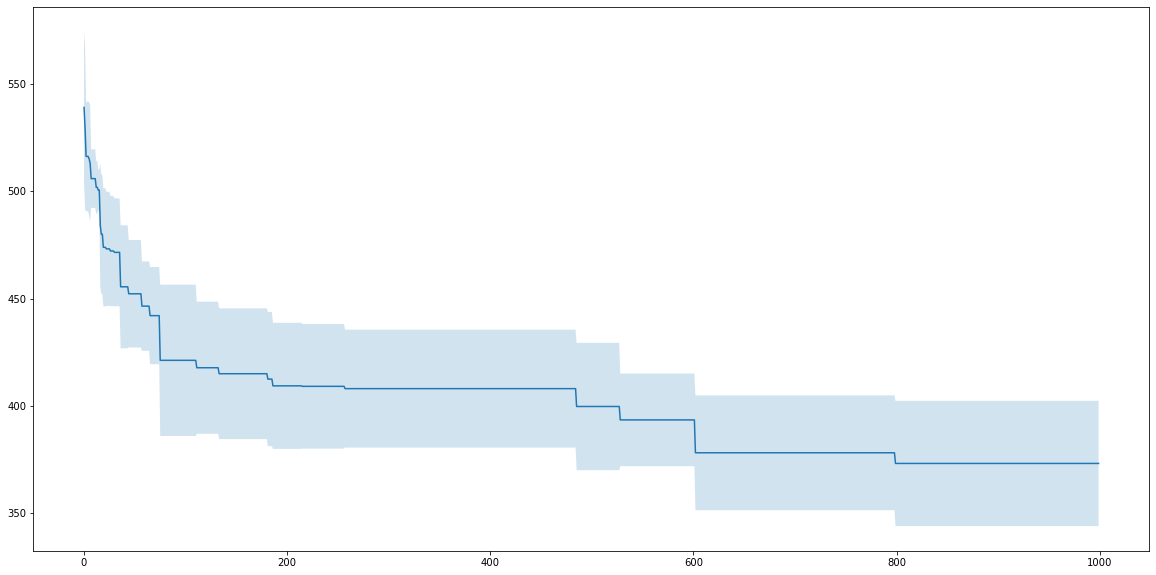

In [12]:
execucoes2 = 5
populacao2 = 100
geracoes2 = 1000

lb2 = [52.547]
ub2 = [126.78]

 

df2 = pd.DataFrame( )

for i in range(execucoes2):

    p2 = Populacao(populacao2,30,lb2,ub2)

    rw2 = RandomWalk(p2,geracoes2)

    fts2 = rw2.executar() 

    df2['Exec '+str(i+1)]=fts2

display(df2)

#gráfico das execucoes
df2.plot(figsize=(20,10))

# calculo media e dp

mtemp= df2.iloc[:,list(range(execucoes))].mean(axis=1)
desviotemp = df2.iloc[:,list(range(execucoes))].std(axis=1)
 
df2['media'] = mtemp
df2['desvio'] = desviotemp
 
 
df2['di'] = df2['media']-df2['desvio']
df2['ds'] = df2['media']+df2['desvio']

display(df2)

 
# gráfico da media e desvio
plt.figure(figsize=(20,10))
plt.plot(df2['media'],label='Media')
#plt.plot(df2['desvio'],label='desvio')
plt.fill_between(list(range(geracoes2)),df2['di'],df2['ds'],alpha=0.2)
plt.show()




## 1.7.2 Considerações

1. O RW apresenta um péssimo resultado dado a dificuldade do problema;
3. O RW aparenta não convergir para uma resposta satisfatória;
2. Com o aumentos das execuções e gerações passa a demorar muito.







# 2 PSO
![Fig 1](img/pso.jpg)


## 2.1 Particula

In [13]:
import operator
import copy

class Particula:

    def __init__(self, atributos, lb,ub):
        self.posicoes = []
        self.velocidades = []
        self.lb = lb
        self.ub = ub

        self.atributos = atributos

        self.fitness = 0
        #na inicializacao o local best é o melhor
        self.localBest = self

        self.velocidade = random.uniform(0,1)

        #self.iniciar_posicoes_aleatorias()
        self.posicoes = gerar_lista_aleatoria(atributos, lb,ub)

        self.iniciar_velocidades_aleatorias()
        self.posicao_inicial()

        if len(self.lb)==1:
            self.calcular_fitness_palavra()
        else:
            self.calcular_fitness_equacao()



    def posicao_inicial(self):
        for i in range(len(self.posicoes)):
            self.posicoes[i] = self.posicoes[i] + self.velocidades[i]

    def iniciar_posicoes_aleatorias(self):
        # criacao dos posicoes aleatorios
 

        for i in range(self.atributos):
            if len(self.lb)==1:
                                  #valor = self.lb[0] + (self.ub[0] - self.lb[0]) * valor_aleatorio
                self.posicoes.append(  (self.lb[0]+(self.ub[0] - self.lb[0])) * random.uniform(0,1) )
#                self.posicoes.append( round(lb[0]+random.uniform(0,1)* (ub[0] - lb[0])) )
            else:
                self.posicoes.append( (self.lb[i]+random.uniform(0,1)* (self.ub[i] - lb[i])) )

    def iniciar_velocidades_aleatorias(self):
        for i in range(self.atributos):
            self.velocidades.append(self.posicoes[i] * self.velocidade )


    def calcular_fitness_equacao(self):
        fun = 10 * (self.posicoes[0]-1)**2 + 20 * (self.posicoes[1]-2)**2 + 30 * (self.posicoes[2]-3)**2
        #fun_normalizado = (fun - 0) / (750-0)
       # self.fitness = fun_normalizado
        self.fitness = fun
 

    def calcular_fitness_palavra(self):
        palavra_alvo = [52.547,72.154,53.694,57.771,115.88,105.59,75.368,126.02,52.756,85.100,80.525,111.24,113.62,64.95,89.181,85.647,101.71,106.75,110.37,72.082,104.38,102.41,63.009,59.52,89.869,126.78,77.231,96.821,67.905,110.1]
           
        diferenca = 0 
        for i in range(len(self.posicoes)):
            diferenca = diferenca + abs(palavra_alvo[i] - self.posicoes[i])   

        #diferenca = (diferenca - 52.547) / (126.78 - 52.547)
        
            
        self.fitness = diferenca
    def __str__(self):
        return " ".join([str(_) for _ in self.posicoes]) + " * fitness= " + str(self.fitness) 


## 2.2 Enxame

In [14]:
 
 class Enxame:
    def __init__(self, tamanhoPopulacao,atributos, lb,ub):
        self.tamanho = tamanhoPopulacao
        self.atributos = atributos
        self.particulas = []
        self.gBest = ()
        self.historico_fiteness = []
        #self.geracoes = geracoes
        self.lb = lb
        self.ub = ub


        # populacao
        self.criar_enxame()

        #self.executar()
       
    def criar_enxame(self):
        for i in range(self.tamanho):
            p = Particula(self.atributos,self.lb,self.ub)
            self.particulas.append(p) 

    def movimentar(self,geracoes, w, c1, c2):

        # encontra o primeiro Global best
        refMelhorFit = min(self.particulas, key=operator.attrgetter('fitness'))
        self.gBest = copy.deepcopy(refMelhorFit)


        for t in range(geracoes):
            for  particula in self.particulas:

                for i in range(len(particula.posicoes)):

                    particula.posicoes[i] = particula.posicoes[i] + particula.velocidades[i]

                    r1 = random.uniform(0,1)
                    r2 = random.uniform(0,1)

                    particula.velocidades[i] = w * particula.velocidades[i] + c1*r1* (particula.localBest.posicoes[i] - particula.posicoes[i])+ c2 * r2 *(self.gBest.posicoes[i] - particula.posicoes[i])

                #particula.calcular_fitness()
                if len(particula.lb)==1:
                    particula.calcular_fitness_palavra()
                else:
                    particula.calcular_fitness_equacao()

                        
                if ( particula.fitness < particula.localBest.fitness):
                    particula.localBest = copy.deepcopy(particula)

                if ( particula.fitness < self.gBest.fitness):
                    self.gBest = copy.deepcopy(particula)
            self.historico_fiteness.append(self.gBest.fitness)



## 2.3 PSO


In [15]:
 
class PSO:
     def __init__(self,populacao, geracoes,atributos,lb,ub):
         
        self.geracoes = geracoes
        self.enxame = Enxame(populacao,atributos,lb,ub) 
      
     def executar(self):
        melhores_fitiness = []
        
        # peso da inércia
        w = 0.4

        # Fator de aceleracao
        c1 = c2 = 2

        self.enxame.movimentar(self.geracoes,w,c1,c2)

        melhores_fitiness.append(self.enxame.historico_fiteness)
        #print(len(self.enxame.historico_fiteness)    )
        return self.enxame.historico_fiteness     
 


## 2.4 Peoblema 01: Equação pso

,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5
0,9.629950,5.815972,40.642671,16.027173,5.637250
1,4.112902,3.194050,16.394528,1.277716,5.637250
2,1.607774,3.194050,9.341778,1.277716,2.747178
3,1.607774,2.461385,3.211380,0.901121,2.747178
4,0.545977,1.214110,0.578774,0.248926,1.499982
...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.000000,0.000000,0.000000,0.000000,0.000000


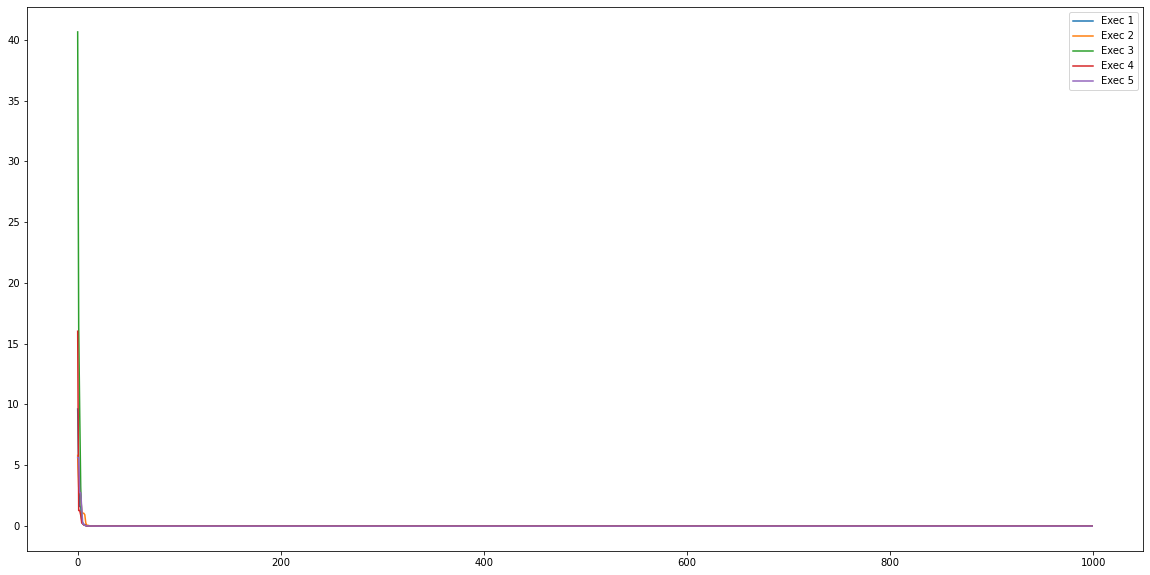

<Figure size 2160x720 with 0 Axes>

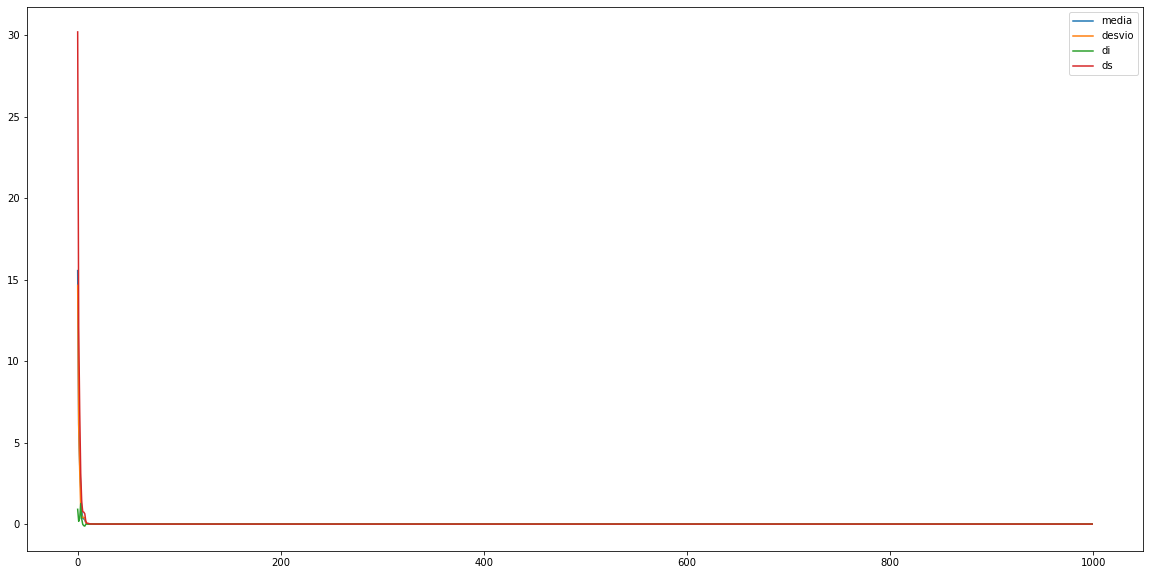

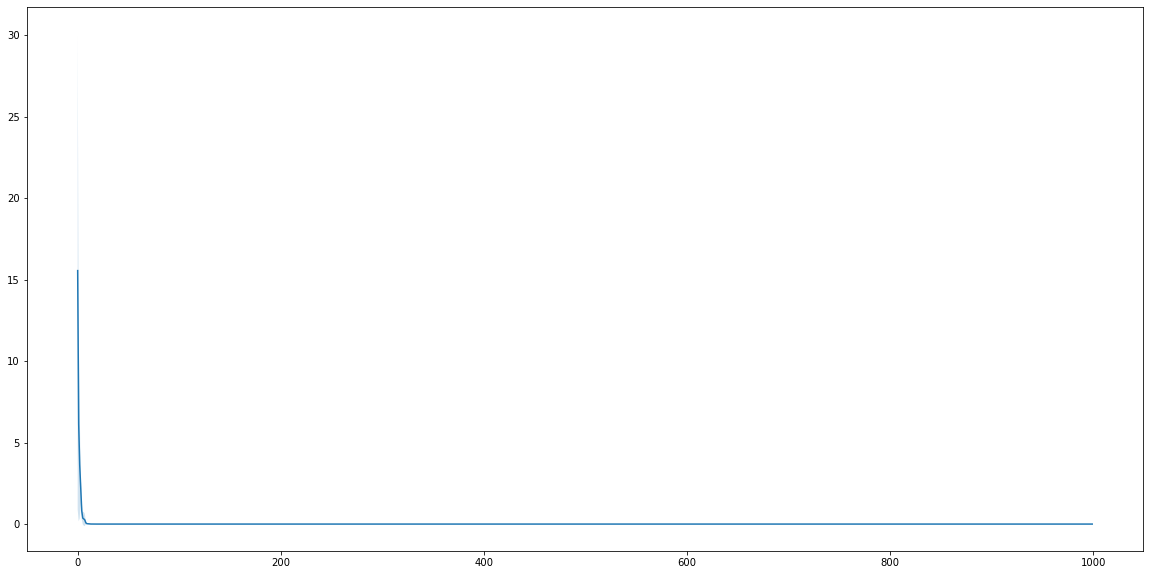

In [16]:
 

df_pso_p01 = pd.DataFrame()

for i in range(execucoes):
    pso_p01 = PSO(populacao,geracoes,3,lb,ub)
    fts_01 =  pso_p01.executar()

    df_pso_p01['Exec '+str(i+1)]=fts_01

display(df_pso_p01)
#print('Best Fitness')
#print(pso_p01.enxame.gBest)

#gráfico das execucoes
df_pso_p01.plot(figsize=(20,10))

# calculo media e dp

mtemp= df_pso_p01.iloc[:,list(range(execucoes))].mean(axis=1)
desviotemp = df_pso_p01.iloc[:,list(range(execucoes))].std(axis=1)
 
df_pso_p01['media'] = mtemp
df_pso_p01['desvio'] = desviotemp
 
 
df_pso_p01['di'] = df_pso_p01['media']-df_pso_p01['desvio']
df_pso_p01['ds'] = df_pso_p01['media']+df_pso_p01['desvio']

#display(df2)
plt.figure(figsize=(30,10))
#df.plot().fill_between()
df_pso_p01.plot(y=["media","desvio","di","ds"],figsize=(20,10))



# gráfico da media e desvio
plt.figure(figsize=(20,10))
plt.plot(df_pso_p01['media'],label='Media')
#plt.plot(df_pso_p01['desvio'],label='desvio')
plt.fill_between(list(range(geracoes)),df_pso_p01['di'],df_pso_p01['ds'],alpha=0.2)
plt.show()


 

 

## 2.5 Comparação Problema Equação Rw x PSO

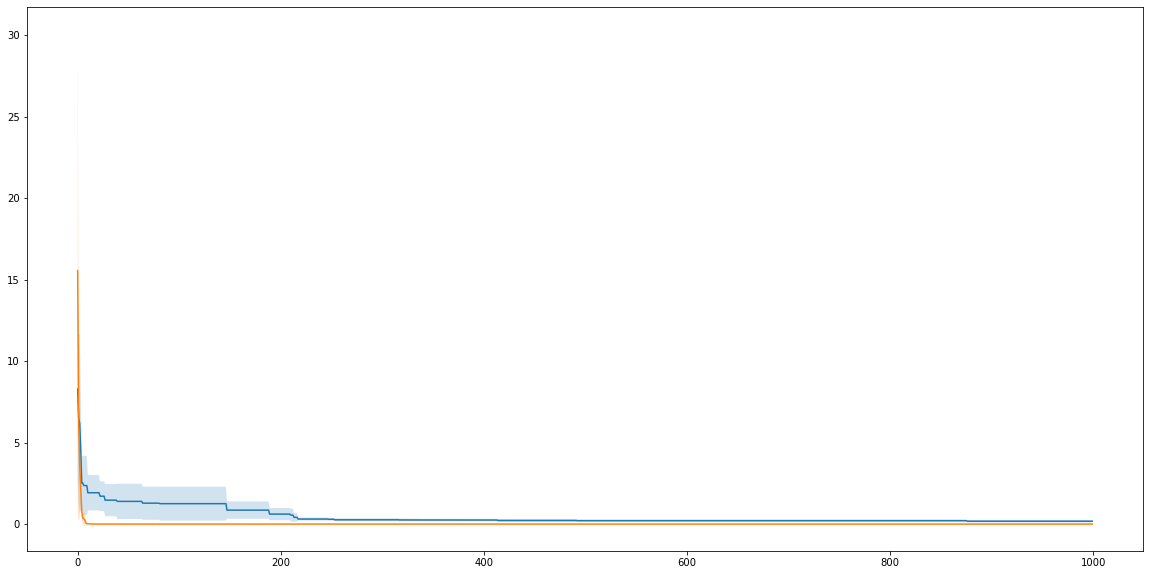

In [17]:


# comparacao
plt.figure(figsize=(20,10))
plt.fill_between(list(range(geracoes)),df['di'],df['ds'],alpha=0.2)
plt.plot(df['media'],label='rw')
plt.fill_between(list(range(geracoes)),df_pso_p01['di'],df_pso_p01['ds'],alpha=0.2)
plt.plot(df_pso_p01['media'],label='pso')

plt.show()

## 2.6 Problem Palavra PSO

,Exec 1,Exec 2,Exec 3,Exec 4,Exec 5
0,641.944237,717.014131,666.870653,665.341591,645.299455
1,615.823947,717.014131,666.870653,665.341591,645.299455
2,584.557724,717.014131,585.361865,645.472771,645.299455
3,584.557724,664.778070,585.361865,596.292862,645.299455
4,573.506337,648.651745,504.729296,574.733342,601.431440
...,...,...,...,...,...
995,0.000411,0.000001,0.023050,7.413673,0.000013
996,0.000411,0.000001,0.023050,7.413673,0.000013
997,0.000411,0.000001,0.023050,7.413673,0.000013
998,0.000411,0.000001,0.023050,7.413673,0.000013


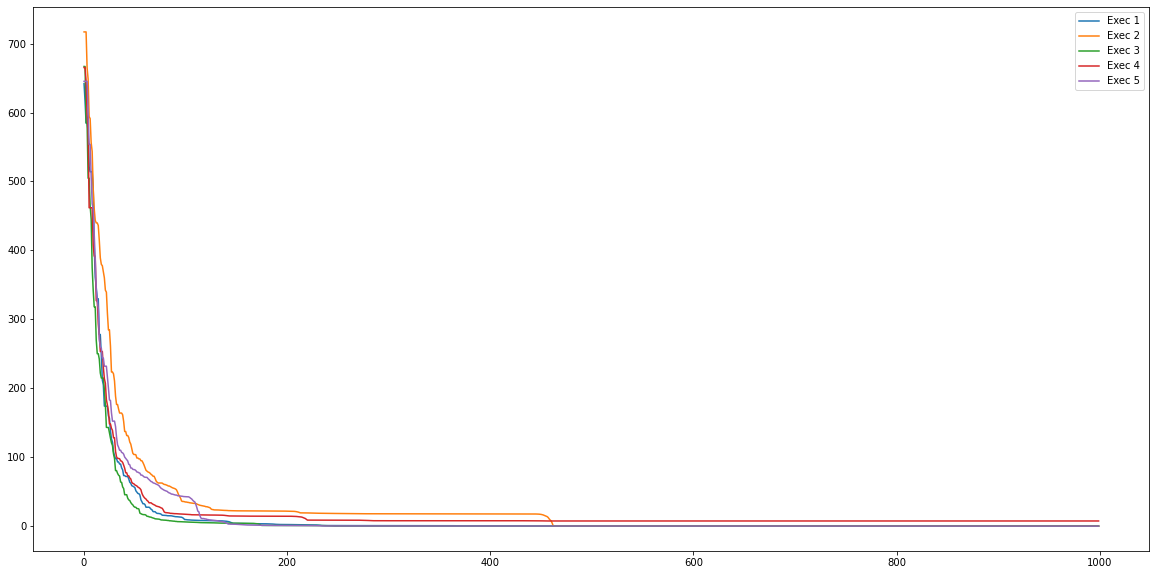

<Figure size 2160x720 with 0 Axes>

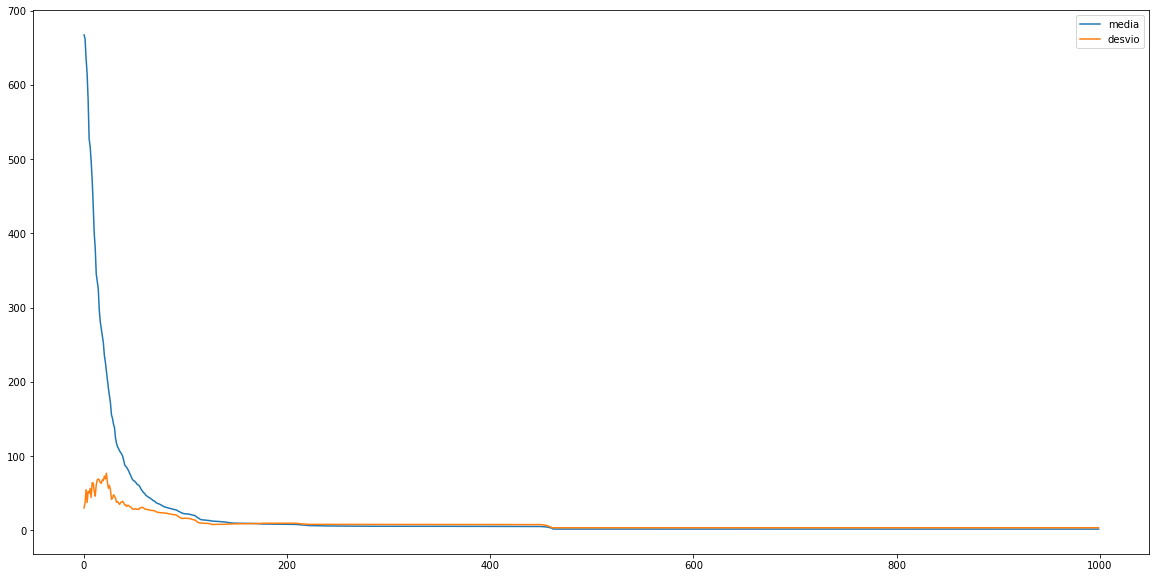

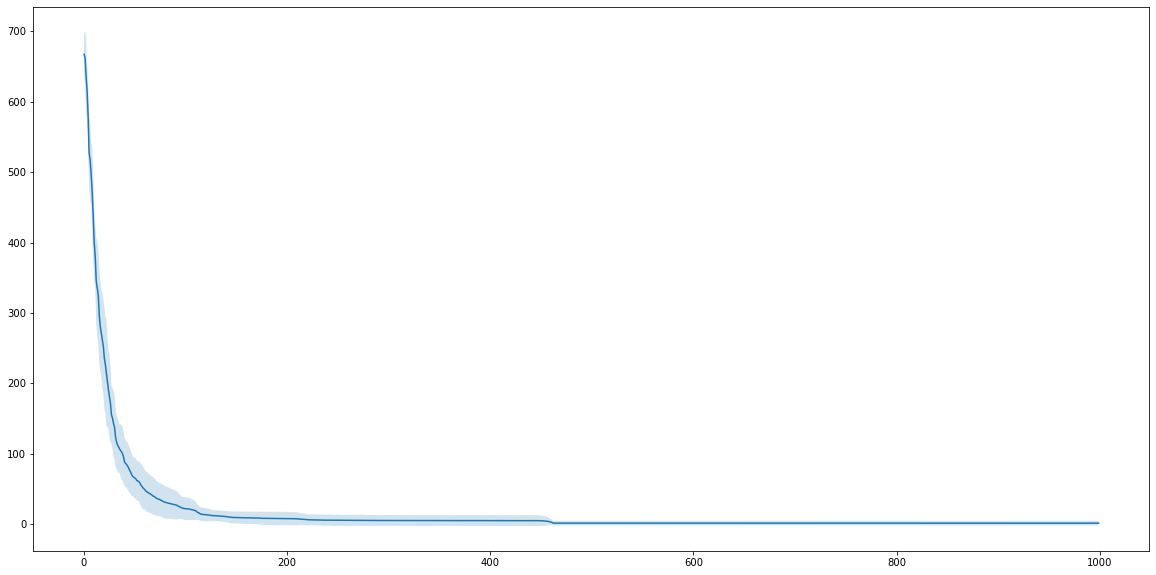

In [18]:
 
df_pso_p02 = pd.DataFrame()

for i in range(execucoes2):
    pso_p02 = PSO(populacao2,geracoes2,30,lb2,ub2)
    fts_02 =  pso_p02.executar()

    df_pso_p02['Exec '+str(i+1)]=fts_02

display(df_pso_p02)

#gráfico das execucoes
df_pso_p02.plot(figsize=(20,10))
#print('best fitness')
#print(pso_p02.enxame.gBest)

# calculo media e dp

mtemp= df_pso_p02.iloc[:,list(range(execucoes2))].mean(axis=1)
desviotemp = df_pso_p02.iloc[:,list(range(execucoes2))].std(axis=1)
 
df_pso_p02['media'] = mtemp
df_pso_p02['desvio'] = desviotemp
 
 
df_pso_p02['di'] = df_pso_p02['media']-df_pso_p02['desvio']
df_pso_p02['ds'] = df_pso_p02['media']+df_pso_p02['desvio']

#display(df2)
plt.figure(figsize=(30,10))
#df.plot().fill_between()
df_pso_p02.plot(y=["media","desvio"],figsize=(20,10))
#df_pso_p02.plot(y=["media","desvio","di","ds"],figsize=(20,10))


# gráfico da media e desvio
plt.figure(figsize=(20,10))
plt.plot(df_pso_p02['media'],label='Media')
#plt.plot(df_pso_p01['desvio'],label='desvio')
plt.fill_between(list(range(geracoes2)),df_pso_p02['di'],df_pso_p02['ds'],alpha=0.2)
plt.show()



## 2.7 Problema Palavra Comparação Rw x PSO

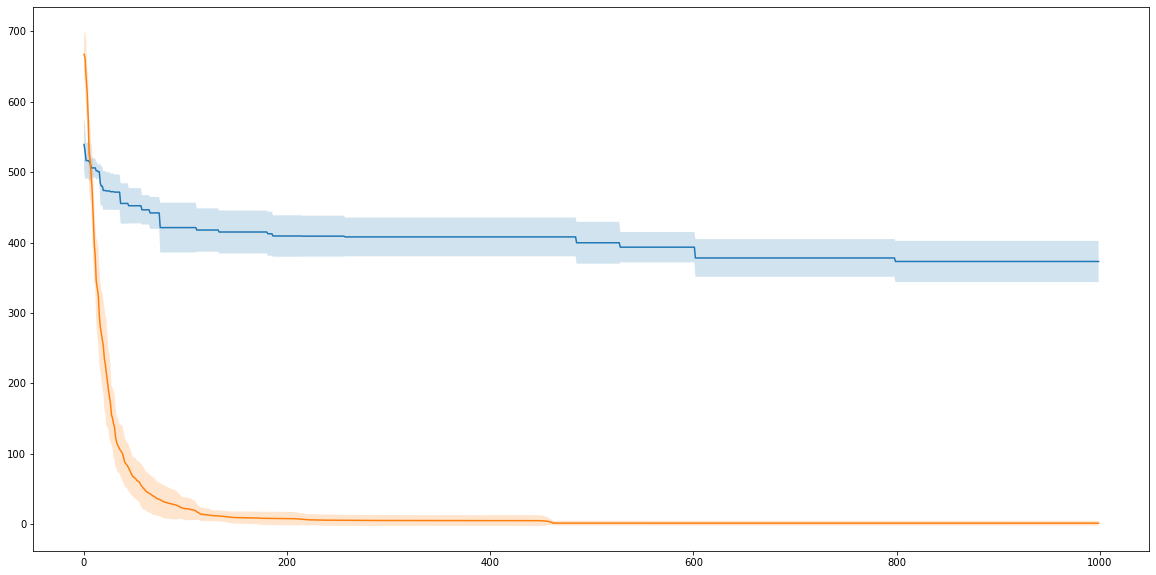

In [19]:
# comparacao
plt.figure(figsize=(20,10))
plt.fill_between(list(range(geracoes)),df2['di'],df2['ds'],alpha=0.2)

plt.plot(df2['media'],label='rw')

plt.fill_between(list(range(geracoes)),df_pso_p02['di'],df_pso_p02['ds'],alpha=0.2)
plt.plot(df_pso_p02['media'],label='pso')



 


In [20]:
pso_p02.enxame.gBest.fitness

1.2636331099713516e-05

## 2.8 Considerações


-  A importância do fator de inércia (0.9 x 0.4)
    - Com 0.9 o random walk apresenta melhor resultado em problemas complexos
    - Com 0.4 apresenta um resultado muito bom para o pso
- 